# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from string import Template
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating the DF
df = pd.DataFrame({"City":cities})
df["Lat"]= ""
df["Lng"]= ""
df["Max Temp"] = ""
df["Humidity"]= ""
df['Cloudiness'] = ""
df["Wind Speed"]= ""
df["Country"] = ""
df["Date"] = ""


In [4]:
# set up a parameters dictionary
params = {
    "units": "&units=Imperial",
    "key": "&appid=" + weather_api_key
}
api = Template("http://api.openweathermap.org/data/2.5/weather?q=${city}${units}${key}")

sets = 1
number = 1
print("Beginning Data Retrieval")
for index,row in df.iterrows():
    params["city"] = row['City']
    base_url = api.substitute(params)
    try:
        weather_response = requests.get(base_url).json()
        print(f"Processing Record {number} of Set {sets} | {row['City']}")
        
        df.loc[index, 'Lat'] = weather_response['coord']['lat']
        df.loc[index, 'Lng'] = weather_response['coord']['lon']
        df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        df.loc[index, 'Cloudiness'] =weather_response["clouds"]["all"]
        df.loc[index, 'Wind Speed'] =weather_response['wind']['speed']
        df.loc[index, 'Country'] =weather_response['sys']['country']
        df.loc[index, 'Date'] =int(time.time()) 
        #
    except:
        print("City not found. Skipping...")
    number +=1 
    if number == 51:
        sets += 1
        number = 1
    
    

Beginning Data Retrieval
Processing Record 1 of Set 1 | kisesa
Processing Record 2 of Set 1 | matagami
Processing Record 3 of Set 1 | okoneshnikovo
Processing Record 4 of Set 1 | onguday
Processing Record 5 of Set 1 | bintulu
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 1 | ewa beach
Processing Record 9 of Set 1 | adeje
Processing Record 10 of Set 1 | srednekolymsk
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | nanchang
Processing Record 17 of Set 1 | tabou
Processing Record 18 of Set 1 | at-bashi
Processing Record 19 of Set 1 | jalu
Processing Record 20 of Set 1 | lima
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | almaznyy


Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | woodland
Processing Record 41 of Set 4 | marrakesh
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | nhamunda
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | gairo
Processing Record 47 of Set 4 | san isidro
Processing Record 48 of Set 4 | makakilo city
Processing Record 49 of Set 4 | ankazoabo
Processing Record 50 of Set 4 | diapaga
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | vaini
Processing Record 3 of Set 5 | ha giang
Processing Record 4 of Set 5 | uray
Processing Record 5 of Set 5 | sisimiut
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | dunbar
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | ketchikan
Processing Record 10 of Set 5 | praia
Processing Record 11 of Set 5 | gubkinskiy
Processing Record 12 of Set 5 | buraydah
Processin

Processing Record 29 of Set 8 | andenes
Processing Record 30 of Set 8 | eloi mendes
Processing Record 31 of Set 8 | north bend
Processing Record 32 of Set 8 | vestmanna
Processing Record 33 of Set 8 | nizhneudinsk
Processing Record 34 of Set 8 | mitsamiouli
Processing Record 35 of Set 8 | hailar
Processing Record 36 of Set 8 | prado
Processing Record 37 of Set 8 | kendari
Processing Record 38 of Set 8 | boden
Processing Record 39 of Set 8 | sinnamary
Processing Record 40 of Set 8 | san francisco
Processing Record 41 of Set 8 | khandbari
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | falealupo
City not found. Skipping...
Processing Record 44 of Set 8 | henties bay
Processing Record 45 of Set 8 | narsaq
Processing Record 46 of Set 8 | kodinsk
Processing Record 47 of Set 8 | kautokeino
Processing Record 48 of Set 8 | pochutla
Processing Record 49 of Set 8 | rio gallegos
Processing Record 50 of Set 8 | kavaratti
Processing Record 1 of Set 9 | itaituba
Processing Rec

Processing Record 15 of Set 12 | port blair
Processing Record 16 of Set 12 | manzil kamil
Processing Record 17 of Set 12 | kalmunai
Processing Record 18 of Set 12 | progreso
Processing Record 19 of Set 12 | zhytomyr
Processing Record 20 of Set 12 | sao sebastiao
Processing Record 21 of Set 12 | boyolangu
Processing Record 22 of Set 12 | yirol
City not found. Skipping...
Processing Record 23 of Set 12 | septemes-les-vallons
Processing Record 24 of Set 12 | madimba
Processing Record 25 of Set 12 | san quintin
Processing Record 26 of Set 12 | folsom
Processing Record 27 of Set 12 | isla vista
Processing Record 28 of Set 12 | solnechnyy
Processing Record 29 of Set 12 | teguldet
Processing Record 30 of Set 12 | ilinskiy
Processing Record 31 of Set 12 | mandera
Processing Record 32 of Set 12 | diego de almagro
Processing Record 33 of Set 12 | bedesa
Processing Record 34 of Set 12 | sorvag
City not found. Skipping...
Processing Record 35 of Set 12 | mutsamudu
City not found. Skipping...
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
df=df.replace('',np.nan).dropna(axis = 0, how = 'any')
df.index.names = ["City_ID"]
df.to_csv(output_data_file)


In [14]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,18.056110,15.739884,52.607163,73.231598,49.673250,8.161275,1.614652e+09
std,33.596873,90.926929,29.717943,20.072850,40.682764,5.841180,6.167512e+01
min,-54.800000,-175.200000,-37.970000,9.000000,0.000000,0.380000,1.614652e+09
25%,-10.400000,-60.620600,35.600000,64.000000,1.000000,3.530000,1.614652e+09
50%,20.785000,18.423200,63.340000,77.000000,49.000000,6.910000,1.614652e+09
75%,46.816800,96.128500,75.200000,88.000000,90.000000,11.500000,1.614652e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,34.670000,1.614652e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humidity_grt_100 = df[df["Humidity"] > 100]
humidity_grt_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

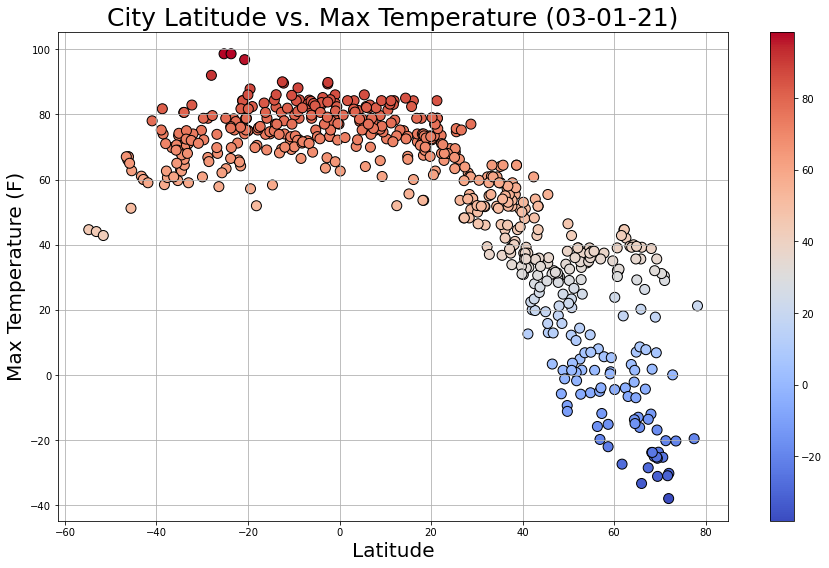

In [10]:
latitues = df['Lat']
temps = df['Max Temp']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (F)",fontsize=20)
ax = plt.scatter(latitues, temps, s=100, c=temps, cmap='coolwarm', edgecolors="black" )
plt.colorbar()
plt.savefig("Temp_city.png")

## Latitude vs. Humidity Plot

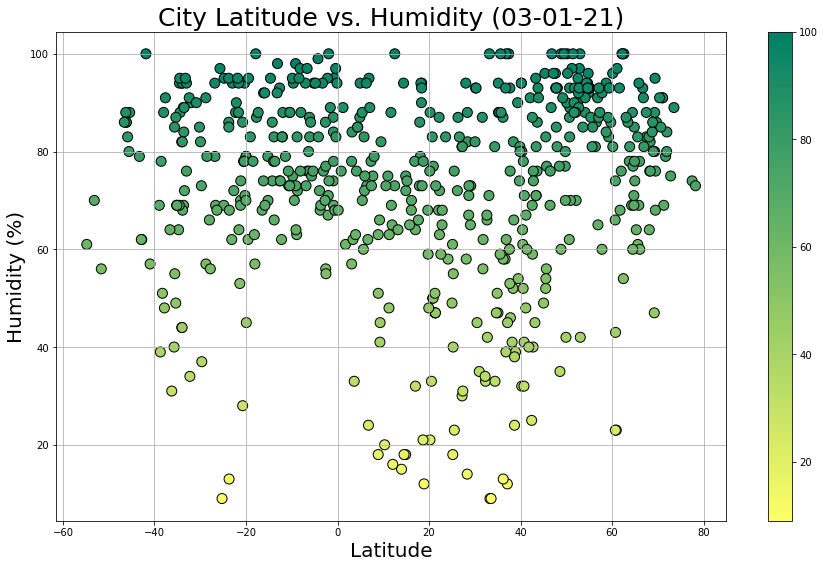

In [11]:
latitues = df['Lat']
humidity  = df['Humidity']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Humidity ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)",fontsize=20)
ax = plt.scatter(latitues, humidity, s=100, c=humidity, cmap='summer_r', edgecolors="black" )
plt.colorbar()
plt.savefig("../Output_Data/Humidity_city.png")

## Latitude vs. Cloudiness Plot

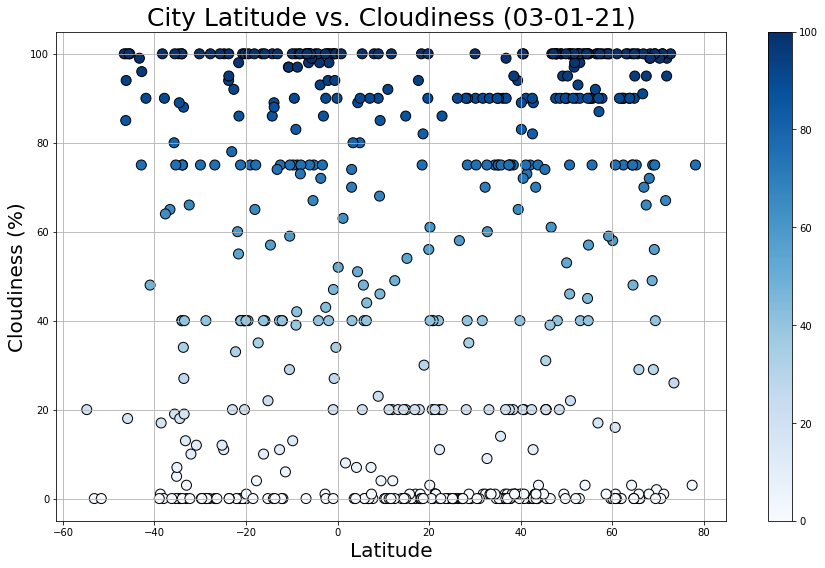

In [12]:
latitues = df['Lat']
cloudiness  = df['Cloudiness']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Cloudiness ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)",fontsize=20)
ax = plt.scatter(latitues, cloudiness, s=100, c=cloudiness, cmap='Blues', edgecolors="black" )
plt.colorbar()
plt.savefig("Cloudiness_city.png")

## Latitude vs. Wind Speed Plot

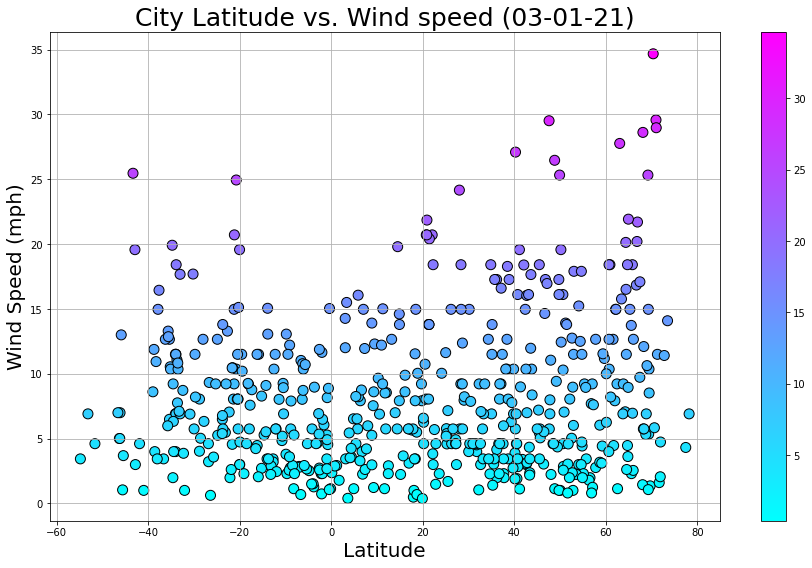

In [18]:
latitues = df['Lat']
wind_speed  = df['Wind Speed']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Wind speed ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)",fontsize=20)
ax = plt.scatter(latitues, wind_speed, s=100, c=wind_speed, cmap='cool', edgecolors="black" )
plt.colorbar()
plt.savefig("Cloudiness_city.png")

## Linear Regression

In [55]:
# obtaining Cities located in the north hemisphere 
northern_hemisphere_df = df[df['Lat'] >= 0]
southern_hemisphere_df = df[df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7377458517400157


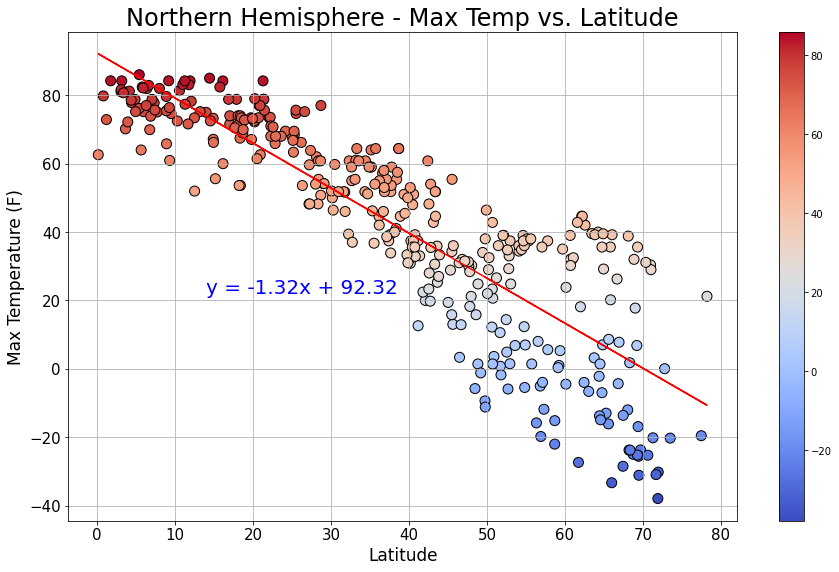

In [67]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_temps = northern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_temps)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Max Temp vs. Latitude", fontsize=24, )
plt.scatter(n_lats,n_temps, s=100, c=n_temps, cmap='coolwarm', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(14,22),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Max Temperature (F)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.27722999562591044


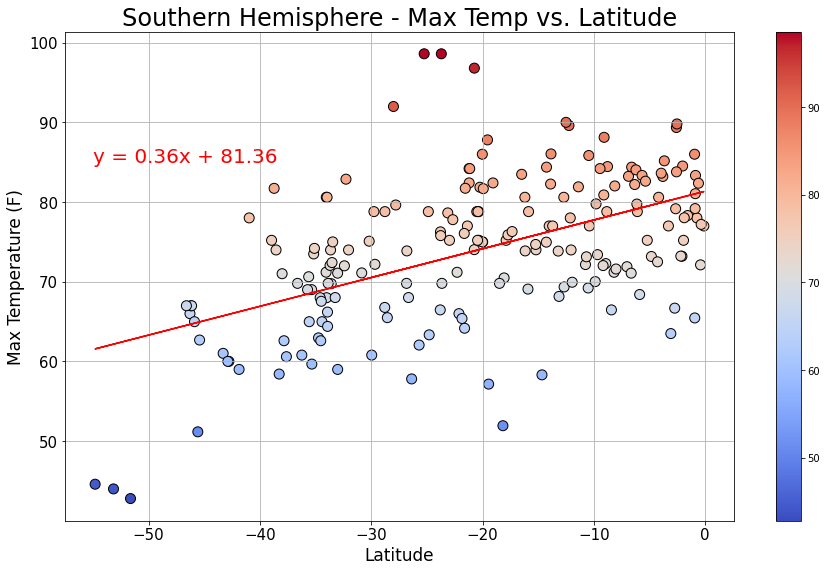

In [66]:
s_lats =  southern_hemisphere_df['Lat']  # latitudes for cities in the Southern hemisphere
s_temps = southern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_temps)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Max Temp vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_temps, s=100, c=s_temps, cmap='coolwarm', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")

plt.annotate(line_eq,(-55,85),fontsize=20,color="red")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Max Temperature (F)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.08248631520948155


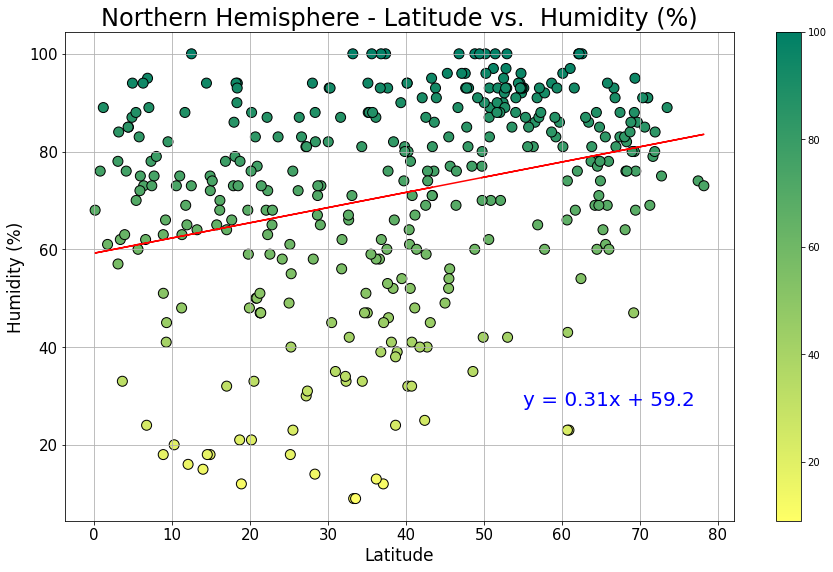

In [65]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_humidity = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_humidity)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Latitude vs.  Humidity (%)", fontsize=24, )
plt.scatter(n_lats,n_humidity, s=100, c=n_humidity, cmap='summer_r', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(55,28),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Humidity (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.04036123921491439


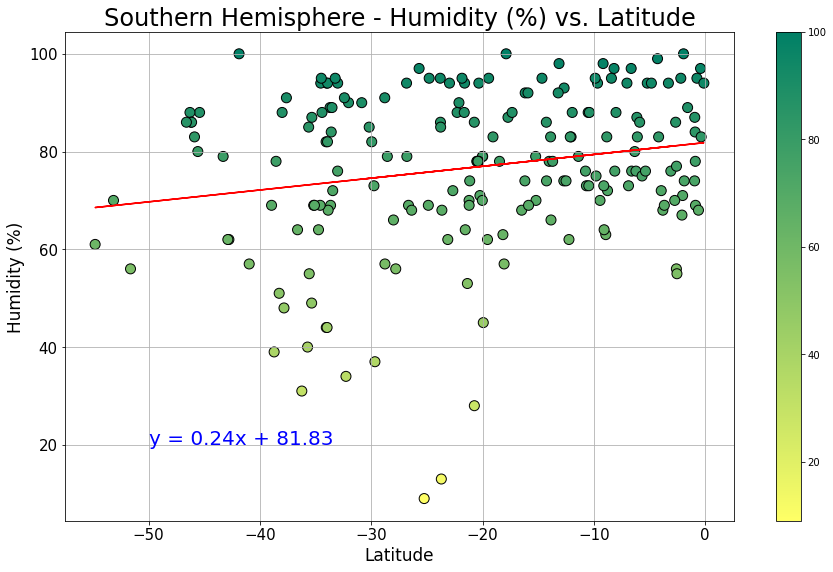

In [87]:
s_lats = southern_hemisphere_df['Lat']  # latitudes for cities in the southern hemisphere
s_humidity = southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_humidity)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_humidity, s=100, c=s_humidity, cmap='summer_r', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")

plt.annotate(line_eq,(-50,20),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Humidity (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.08903953775984906


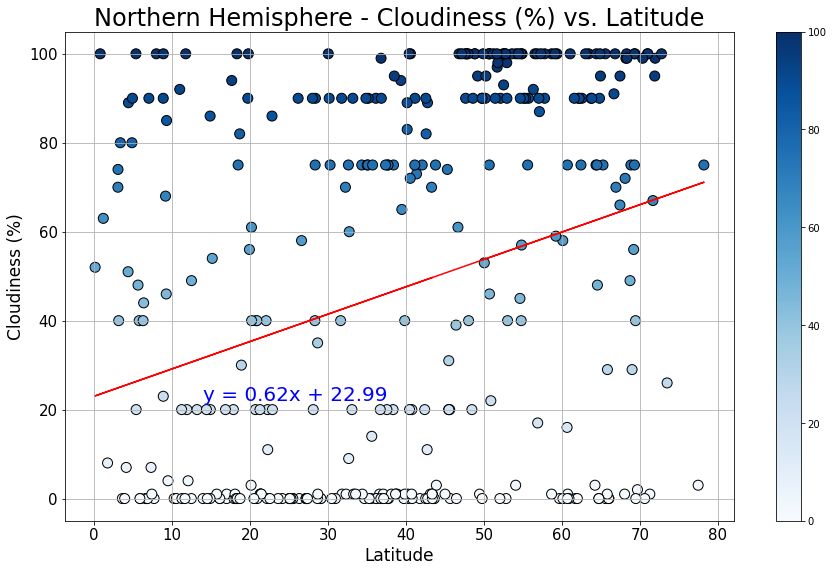

In [76]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_clouds = northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_clouds)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=24, )
plt.scatter(n_lats,n_clouds, s=100, c=n_clouds, cmap='Blues', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(14,22),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Cloudiness (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.049484649371858834


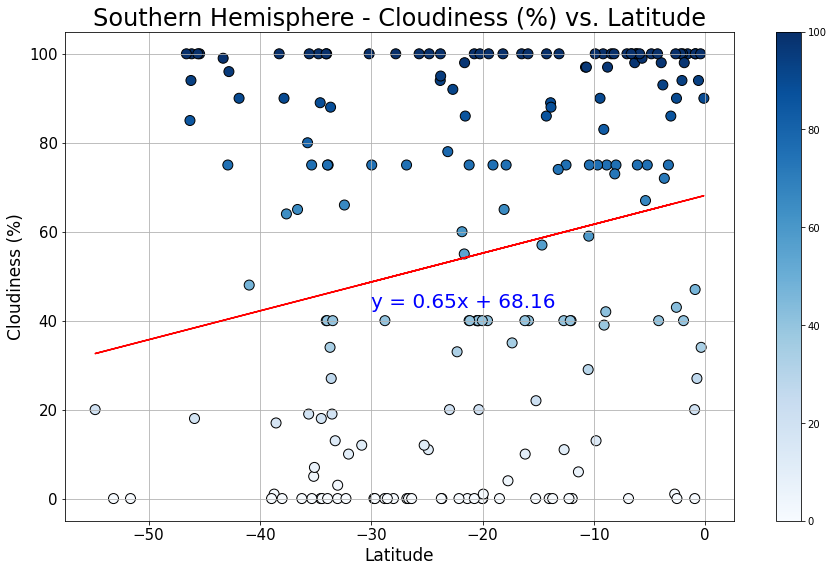

In [85]:
s_lats = southern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
s_clouds = southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_clouds)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_clouds, s=100, c=s_clouds, cmap='Blues', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")

plt.annotate(line_eq,(-30,43),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Cloudiness (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.08903953775984906


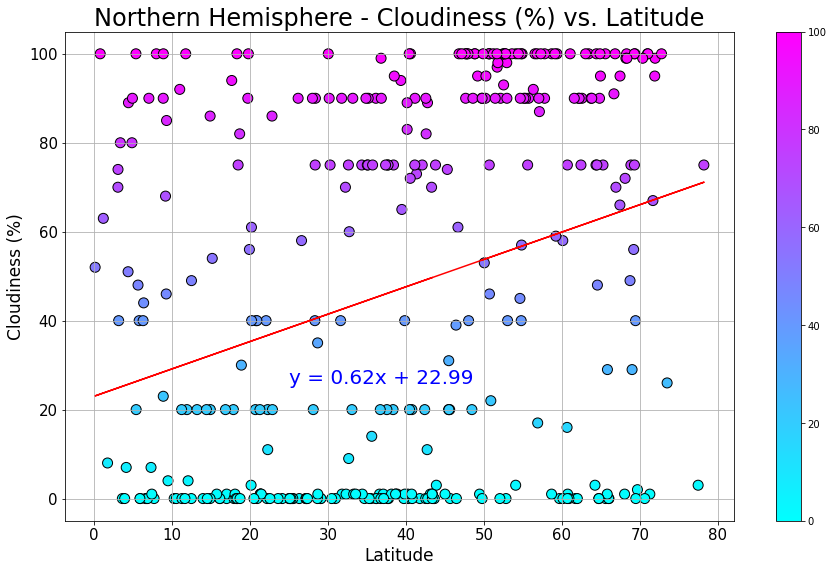

In [83]:
n_lats = northern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
n_winds = northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_winds)

regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=24, )
plt.scatter(n_lats,n_winds, s=100, c=n_winds, cmap='cool', edgecolors="black")
plt.plot(n_lats,regress_values,"r-")

plt.annotate(line_eq,(25,26),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Cloudiness (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.049484649371858834


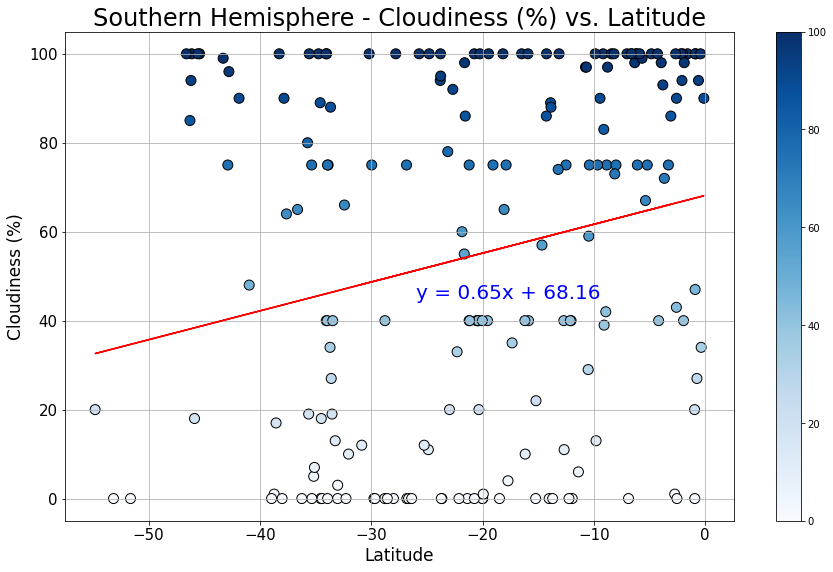

In [89]:
s_lats = southern_hemisphere_df['Lat']  # latitudes for cities in the northern hemisphere
s_winds = southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_winds)

regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(15,9))
plt.grid()
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontsize=24, )
plt.scatter(s_lats,s_winds, s=100, c=s_winds, cmap='Blues', edgecolors="black")
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-26,45),fontsize=20,color="blue")
plt.xlabel("Latitude", fontsize=17)
plt.ylabel("Cloudiness (%)", fontsize=17)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15);
plt.colorbar()
print(f"The r-squared value is: {rvalue**2}")
